# EDA BCN Focus

In [130]:
import os
import requests
from bs4 import BeautifulSoup as bs4
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
import datetime
from plotly.subplots import make_subplots

In [4]:
def extract_date(df):
    df['Year'] = pd.DatetimeIndex(df['date']).year
    df['Month'] = pd.DatetimeIndex(df['date']).month
    df['Day'] = pd.DatetimeIndex(df['date']).day
    
    return df

In [81]:
def drop_rows(df_, column, list_of_values):
    for i in df_[column]:
        if i in list_of_values:
            df_.drop(df_.loc[df_[column]==i].index, inplace = True)
    df_.reset_index(drop=True, inplace=True)
    return df_

# Socio-Economic data

In [4]:
# read file & save to variable 
av_gross_tax_income = pd.read_csv("///Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/bcn_av_gross_taxable_income/2019_atles_renda_bruta_persona.csv")

In [5]:
av_gross_tax_income

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Import_Renda_Bruta_€
0,2019,1,Ciutat Vella,1,el Raval,1,13022
1,2019,1,Ciutat Vella,1,el Raval,2,10797
2,2019,1,Ciutat Vella,1,el Raval,3,10281
3,2019,1,Ciutat Vella,1,el Raval,4,12875
4,2019,1,Ciutat Vella,1,el Raval,5,10810
...,...,...,...,...,...,...,...
1063,2019,10,Sant Martí,73,la Verneda i la Pau,143,14130
1064,2019,10,Sant Martí,65,el Clot,234,17714
1065,2019,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,235,15756
1066,2019,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,236,16748


In [6]:
av_gross_tax_income.rename(columns = {'Codi_Districte':'Codi Districte', 'Nom_Districte':'Nom Districte', 'Codi_Barri':'CodiBarri' , 'Nom_Barri':'Nom Barri' ,'Seccio Censal':'Seccio Censal', 'Import_Renda_Bruta_€':'Import Renda Bruta €' }, inplace = True)

In [8]:
av_gross_tax_income.rename(columns = { 'CodiBarri':'Codi Barri' , 'Seccio Censal':'Seccio Censal', 'Import_Renda_Bruta_€':'Import Renda Bruta €' }, inplace = True)

In [22]:
av_gross_tax_income.columns = av_gross_tax_income.columns.str.replace('Import_Renda_Bruta_€', 'Import Renda Bruta €')

In [32]:
av_gross_tax_income.columns = av_gross_tax_income.columns.str.replace('Import Renda Bruta €', 'Gross Income Euros')
av_gross_tax_income

,Any,Codi Districte,Nom Districte,Codi Barri,Nom Barri,Seccio Censal,Gross Income Euros
0,2019,1,Ciutat Vella,1,el Raval,1,13022
1,2019,1,Ciutat Vella,1,el Raval,2,10797
2,2019,1,Ciutat Vella,1,el Raval,3,10281
3,2019,1,Ciutat Vella,1,el Raval,4,12875
4,2019,1,Ciutat Vella,1,el Raval,5,10810
...,...,...,...,...,...,...,...
1063,2019,10,Sant Martí,73,la Verneda i la Pau,143,14130
1064,2019,10,Sant Martí,65,el Clot,234,17714
1065,2019,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,235,15756
1066,2019,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,236,16748


In [30]:
av_gross_tax_income

,Any,Codi Districte,Nom Districte,Codi Barri,Nom Barri,Seccio Censal,Import Renda Bruta €
0,2019,1,Ciutat Vella,1,el Raval,1,13022
1,2019,1,Ciutat Vella,1,el Raval,2,10797
2,2019,1,Ciutat Vella,1,el Raval,3,10281
3,2019,1,Ciutat Vella,1,el Raval,4,12875
4,2019,1,Ciutat Vella,1,el Raval,5,10810
...,...,...,...,...,...,...,...
1063,2019,10,Sant Martí,73,la Verneda i la Pau,143,14130
1064,2019,10,Sant Martí,65,el Clot,234,17714
1065,2019,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,235,15756
1066,2019,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,236,16748


In [21]:
av_gross_tax_income.dtypes

Any                                      int64
Codi Districte                           int64
Nom Districte                           object
Codi Barri                               int64
Nom Barri                               object
Seccio Censal                            int64
Import_Renda_Bruta_€                     int64
dtype: object

In [44]:
av_gross_tax_income.rename(columns = {'Gross Income Euros                ':'Gross Income Euros'}, inplace = True)

In [45]:
av_gross_tax_income

,Any,Codi Districte,Nom Districte,Codi Barri,Nom Barri,Seccio Censal,Gross Income Euros
0,2019,1,Ciutat Vella,1,el Raval,1,13022
1,2019,1,Ciutat Vella,1,el Raval,2,10797
2,2019,1,Ciutat Vella,1,el Raval,3,10281
3,2019,1,Ciutat Vella,1,el Raval,4,12875
4,2019,1,Ciutat Vella,1,el Raval,5,10810
...,...,...,...,...,...,...,...
1063,2019,10,Sant Martí,73,la Verneda i la Pau,143,14130
1064,2019,10,Sant Martí,65,el Clot,234,17714
1065,2019,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,235,15756
1066,2019,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,236,16748


In [46]:
# group by 
barri_av = av_gross_tax_income.groupby(['Nom Districte', 'Nom Barri'])['Gross Income Euros'].mean()
barri_av

Nom Districte        Nom Barri                            
Ciutat Vella         Sant Pere, Santa Caterina i la Ribera    17332.076923
                     el Gòtic                                 16390.333333
                     el Raval                                 11778.523810
                     la Barceloneta                           15094.272727
Eixample             Sant Antoni                              21295.625000
                                                                  ...     
Sarrià-Sant Gervasi  Sant Gervasi - la Bonanova               38214.777778
                     Sarrià                                   37919.812500
                     Vallvidrera, el Tibidabo i les Planes    30409.666667
                     el Putget i Farró                        29500.842105
                     les Tres Torres                          44188.909091
Name: Gross Income Euros, Length: 73, dtype: float64

In [47]:
pd.DataFrame(barri_av)

Gross Income Euros
Nom Districte       Nom Barri                                                
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera        17332.076923
                    el Gòtic                                     16390.333333
                    el Raval                                     11778.523810
                    la Barceloneta                               15094.272727
Eixample            Sant Antoni                                  21295.625000
...                                                                       ...
Sarrià-Sant Gervasi Sant Gervasi - la Bonanova                   38214.777778
                    Sarrià                                       37919.812500
                    Vallvidrera, el Tibidabo i les Planes        30409.666667
                    el Putget i Farró                            29500.842105
                    les Tres Torres                              44188.909091

[73 rows x 1 columns]

In [48]:
#reset index
barri_av.reset_index(drop=True)

0     17332.076923
1     16390.333333
2     11778.523810
3     15094.272727
4     21295.625000
          ...     
68    38214.777778
69    37919.812500
70    30409.666667
71    29500.842105
72    44188.909091
Name: Gross Income Euros, Length: 73, dtype: float64

In [49]:
#Saving compact version
barri_av.to_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/bcn_av_gross_taxable_income/barri_av.csv")

In [50]:
#Reading compact version 
barri_av = pd.read_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/bcn_av_gross_taxable_income/barri_av.csv")

In [51]:
barri_av

,Nom Districte,Nom Barri,Gross Income Euros
0,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",17332.076923
1,Ciutat Vella,el Gòtic,16390.333333
2,Ciutat Vella,el Raval,11778.523810
3,Ciutat Vella,la Barceloneta,15094.272727
4,Eixample,Sant Antoni,21295.625000
...,...,...,...
68,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,38214.777778
69,Sarrià-Sant Gervasi,Sarrià,37919.812500
70,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",30409.666667
71,Sarrià-Sant Gervasi,el Putget i Farró,29500.842105


In [59]:
barri_av_sorted = barri_av.round(decimals=2)

In [60]:
barri_av_sorted

,Nom Districte,Nom Barri,Gross Income Euros
0,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",17332.08
1,Ciutat Vella,el Gòtic,16390.33
2,Ciutat Vella,el Raval,11778.52
3,Ciutat Vella,la Barceloneta,15094.27
4,Eixample,Sant Antoni,21295.62
...,...,...,...
68,Sarrià-Sant Gervasi,Sant Gervasi - la Bonanova,38214.78
69,Sarrià-Sant Gervasi,Sarrià,37919.81
70,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",30409.67
71,Sarrià-Sant Gervasi,el Putget i Farró,29500.84


In [61]:
#Saving compact version
barri_av_sorted.to_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/bcn_av_gross_taxable_income/barri_av_sorted.csv")

## District AV

In [62]:
district_av = av_gross_tax_income.groupby(['Nom Districte'])['Gross Income Euros'].mean()
district_av

Nom Districte
Ciutat Vella           14559.555556
Eixample               24546.150289
Gràcia                 23457.839080
Horta-Guinardó         18450.715447
Les Corts              29403.245614
Nou Barris             14577.572650
Sant Andreu            18285.726316
Sant Martí             18840.503401
Sants-Montjuïc         17835.547009
Sarrià-Sant Gervasi    37289.846939
Name: Gross Income Euros, dtype: float64

In [65]:
district_av_sorted= district_av.round(decimals=2)
district_av_sorted

Nom Districte
Ciutat Vella           14559.56
Eixample               24546.15
Gràcia                 23457.84
Horta-Guinardó         18450.72
Les Corts              29403.25
Nou Barris             14577.57
Sant Andreu            18285.73
Sant Martí             18840.50
Sants-Montjuïc         17835.55
Sarrià-Sant Gervasi    37289.85
Name: Gross Income Euros, dtype: float64

In [66]:
pd.DataFrame(district_av_sorted)

,Gross Income Euros
Nom Districte,
Ciutat Vella,14559.56
Eixample,24546.15
Gràcia,23457.84
Horta-Guinardó,18450.72
Les Corts,29403.25
Nou Barris,14577.57
Sant Andreu,18285.73
Sant Martí,18840.50
Sants-Montjuïc,17835.55


In [67]:
#reset index
district_av_sorted.reset_index(drop=True)

0    14559.56
1    24546.15
2    23457.84
3    18450.72
4    29403.25
5    14577.57
6    18285.73
7    18840.50
8    17835.55
9    37289.85
Name: Gross Income Euros, dtype: float64

In [68]:
#Saving compact version
district_av_sorted.to_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/bcn_av_gross_taxable_income/district_av_sorted.csv")

In [69]:
#Reading compact version 
district_av_sorted = pd.read_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/bcn_av_gross_taxable_income/district_av_sorted.csv")

In [70]:
district_av_sorted

,Nom Districte,Gross Income Euros
0,Ciutat Vella,14559.56
1,Eixample,24546.15
2,Gràcia,23457.84
3,Horta-Guinardó,18450.72
4,Les Corts,29403.25
5,Nou Barris,14577.57
6,Sant Andreu,18285.73
7,Sant Martí,18840.50
8,Sants-Montjuïc,17835.55
9,Sarrià-Sant Gervasi,37289.85


## Ciutadella

In [2]:
# read file & save to variable 
bcn_ciutadella_encoded_last = pd.read_csv("//Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/bcn_pollution_data/bcn_ciutadella_encoded_last.csv")

In [3]:
bcn_ciutadella_encoded_last

,Unnamed: 0.1,Unnamed: 0,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,...,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column
0,0,0,8019050,Barcelona (Ciutadella),2022-10-01T00:00:00.000,7,NO,b'\xc2\xb5g/m3',background,urban,...,5.0,3.0,2.0,1.0,2.0,1.0,7,41.386406,2.187398,POINT (2.1873982 41.386406)
1,1,1,8019050,Barcelona (Ciutadella),2022-10-01T00:00:00.000,14,O3,b'\xc2\xb5g/m3',background,urban,...,66.0,63.0,60.0,56.0,51.0,35.0,7,41.386406,2.187398,POINT (2.1873982 41.386406)
2,2,2,8019050,Barcelona (Ciutadella),2022-10-01T00:00:00.000,12,NOX,b'\xc2\xb5g/m3',background,urban,...,27.0,28.0,27.0,30.0,32.0,31.0,7,41.386406,2.187398,POINT (2.1873982 41.386406)
3,3,3,8019050,Barcelona (Ciutadella),2022-10-01T00:00:00.000,8,NO2,b'\xc2\xb5g/m3',background,urban,...,20.0,24.0,25.0,28.0,30.0,30.0,7,41.386406,2.187398,POINT (2.1873982 41.386406)
4,4,4,8019050,Barcelona (Ciutadella),2022-09-30T00:00:00.000,12,NOX,b'\xc2\xb5g/m3',background,urban,...,43.0,32.0,75.0,53.0,10.0,12.0,7,41.386406,2.187398,POINT (2.1873982 41.386406)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19211,19211,19211,8019050,Barcelona (Ciutadella),2010-01-01T00:00:00.000,14,O3,b'\xc2\xb5g/m3',background,urban,...,65.0,60.0,57.0,57.0,54.0,55.0,7,41.386403,2.187398,POINT (2.187398 41.386403)
19212,19212,19212,8019050,Barcelona (Ciutadella),2010-01-01T00:00:00.000,12,NOX,b'\xc2\xb5g/m3',background,urban,...,21.0,23.0,24.0,20.0,22.0,19.0,7,41.386403,2.187398,POINT (2.187398 41.386403)
19213,19213,19213,8019050,Barcelona (Ciutadella),2010-01-01T00:00:00.000,6,CO,b'mg/m3',background,urban,...,0.6,0.6,0.7,0.7,0.7,0.7,7,41.386403,2.187398,POINT (2.187398 41.386403)
19214,19214,19214,8019050,Barcelona (Ciutadella),2010-01-01T00:00:00.000,7,NO,b'\xc2\xb5g/m3',background,urban,...,2.0,2.0,1.0,1.0,2.0,1.0,7,41.386403,2.187398,POINT (2.187398 41.386403)


In [5]:
#flatten time 
bcn_ciutadella_encoded_last['data'] = pd.to_datetime(bcn_ciutadella_encoded_last['data'])

In [8]:
#change column name
bcn_ciutadella_encoded_last.rename(columns = {'data':'date'}, inplace = True)

In [9]:
# extract year, month, day from date
bcn_ciutadella_encoded_last = extract_date(bcn_ciutadella_encoded_last)

In [11]:
bcn_ciutadella_encoded_last['new date'] = [d.date() for d in bcn_ciutadella_encoded_last['date']]
bcn_ciutadella_encoded_last['new time'] = [d.time() for d in bcn_ciutadella_encoded_last['date']]

In [12]:
bcn_ciutadella_encoded_last

,Unnamed: 0.1,Unnamed: 0,codi_eoi,nom_estacio,date,magnitud,contaminant,unitats,tipus_estacio,area_urbana,...,h24,altitud,latitud,longitud,geocoded_column,Year,Month,Day,new date,new time
0,0,0,8019050,Barcelona (Ciutadella),2022-10-01,7,NO,b'\xc2\xb5g/m3',background,urban,...,1.0,7,41.386406,2.187398,POINT (2.1873982 41.386406),2022,10,1,2022-10-01,00:00:00
1,1,1,8019050,Barcelona (Ciutadella),2022-10-01,14,O3,b'\xc2\xb5g/m3',background,urban,...,35.0,7,41.386406,2.187398,POINT (2.1873982 41.386406),2022,10,1,2022-10-01,00:00:00
2,2,2,8019050,Barcelona (Ciutadella),2022-10-01,12,NOX,b'\xc2\xb5g/m3',background,urban,...,31.0,7,41.386406,2.187398,POINT (2.1873982 41.386406),2022,10,1,2022-10-01,00:00:00
3,3,3,8019050,Barcelona (Ciutadella),2022-10-01,8,NO2,b'\xc2\xb5g/m3',background,urban,...,30.0,7,41.386406,2.187398,POINT (2.1873982 41.386406),2022,10,1,2022-10-01,00:00:00
4,4,4,8019050,Barcelona (Ciutadella),2022-09-30,12,NOX,b'\xc2\xb5g/m3',background,urban,...,12.0,7,41.386406,2.187398,POINT (2.1873982 41.386406),2022,9,30,2022-09-30,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19211,19211,19211,8019050,Barcelona (Ciutadella),2010-01-01,14,O3,b'\xc2\xb5g/m3',background,urban,...,55.0,7,41.386403,2.187398,POINT (2.187398 41.386403),2010,1,1,2010-01-01,00:00:00
19212,19212,19212,8019050,Barcelona (Ciutadella),2010-01-01,12,NOX,b'\xc2\xb5g/m3',background,urban,...,19.0,7,41.386403,2.187398,POINT (2.187398 41.386403),2010,1,1,2010-01-01,00:00:00
19213,19213,19213,8019050,Barcelona (Ciutadella),2010-01-01,6,CO,b'mg/m3',background,urban,...,0.7,7,41.386403,2.187398,POINT (2.187398 41.386403),2010,1,1,2010-01-01,00:00:00
19214,19214,19214,8019050,Barcelona (Ciutadella),2010-01-01,7,NO,b'\xc2\xb5g/m3',background,urban,...,1.0,7,41.386403,2.187398,POINT (2.187398 41.386403),2010,1,1,2010-01-01,00:00:00


In [20]:
bcn_ciutadella_grouped1 = bcn_ciutadella_encoded_last[['new date', 'Year'  ,'Month','Day', 'contaminant', 'unitats', 'h09', 'h12', 'h15', 'h18', 'h21', 'latitud', 'longitud']]

                                                      

In [21]:
bcn_ciutadella_grouped1

,new date,Year,Month,Day,contaminant,unitats,h09,h12,h15,h18,h21,latitud,longitud
0,2022-10-01,2022,10,1,NO,b'\xc2\xb5g/m3',1.0,3.0,17.0,4.0,2.0,41.386406,2.187398
1,2022-10-01,2022,10,1,O3,b'\xc2\xb5g/m3',42.0,67.0,46.0,72.0,60.0,41.386406,2.187398
2,2022-10-01,2022,10,1,NOX,b'\xc2\xb5g/m3',18.0,14.0,71.0,24.0,27.0,41.386406,2.187398
3,2022-10-01,2022,10,1,NO2,b'\xc2\xb5g/m3',17.0,11.0,45.0,18.0,25.0,41.386406,2.187398
4,2022-09-30,2022,9,30,NOX,b'\xc2\xb5g/m3',52.0,19.0,27.0,65.0,75.0,41.386406,2.187398
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19211,2010-01-01,2010,1,1,O3,b'\xc2\xb5g/m3',80.0,77.0,74.0,69.0,57.0,41.386403,2.187398
19212,2010-01-01,2010,1,1,NOX,b'\xc2\xb5g/m3',9.0,11.0,16.0,14.0,24.0,41.386403,2.187398
19213,2010-01-01,2010,1,1,CO,b'mg/m3',0.6,0.7,0.6,0.6,0.7,41.386403,2.187398
19214,2010-01-01,2010,1,1,NO,b'\xc2\xb5g/m3',1.0,2.0,2.0,1.0,1.0,41.386403,2.187398


In [ ]:
bcn_ciutadella_group_timelapse = bcn_ciutadella_grouped1

# Gracia - Sant Gervasi

In [22]:
# read file & save to variable 
bcn_gracia_sangervasi = pd.read_csv("//Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/bcn_pollution_data/bcn_gracia_sangervasi_tasf-thgu.csv")

In [23]:
bcn_gracia_sangervasi

,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,...,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column
0,8019044,Barcelona (Gràcia - Sant Gervasi),2022-10-01T00:00:00.000,14,O3,µg/m3,traffic,urban,8019,Barcelona,...,66.0,66.0,53.0,47.0,45.0,12.0,57,41.398724,2.153399,POINT (2.1533988 41.398724)
1,8019044,Barcelona (Gràcia - Sant Gervasi),2022-10-01T00:00:00.000,10,PM10,µg/m3,traffic,urban,8019,Barcelona,...,21.0,20.0,19.0,20.0,18.0,19.0,57,41.398724,2.153399,POINT (2.1533988 41.398724)
2,8019044,Barcelona (Gràcia - Sant Gervasi),2022-10-01T00:00:00.000,12,NOX,µg/m3,traffic,urban,8019,Barcelona,...,24.0,25.0,37.0,39.0,39.0,93.0,57,41.398724,2.153399,POINT (2.1533988 41.398724)
3,8019044,Barcelona (Gràcia - Sant Gervasi),2022-10-01T00:00:00.000,6,CO,mg/m3,traffic,urban,8019,Barcelona,...,0.2,0.3,0.4,0.3,0.3,0.5,57,41.398724,2.153399,POINT (2.1533988 41.398724)
4,8019044,Barcelona (Gràcia - Sant Gervasi),2022-10-01T00:00:00.000,1,SO2,µg/m3,traffic,urban,8019,Barcelona,...,1.0,1.0,1.0,1.0,1.0,1.0,57,41.398724,2.153399,POINT (2.1533988 41.398724)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29550,8019044,Barcelona (Gràcia - Sant Gervasi),2010-01-01T00:00:00.000,7,NO,µg/m3,traffic,urban,8019,Barcelona,...,4.0,5.0,4.0,3.0,2.0,2.0,57,41.398722,2.153399,POINT (2.1533990000000003 41.398722)
29551,8019044,Barcelona (Gràcia - Sant Gervasi),2010-01-01T00:00:00.000,6,CO,mg/m3,traffic,urban,8019,Barcelona,...,0.3,0.3,0.2,0.2,0.2,0.2,57,41.398722,2.153399,POINT (2.1533990000000003 41.398722)
29552,8019044,Barcelona (Gràcia - Sant Gervasi),2010-01-01T00:00:00.000,1,SO2,µg/m3,traffic,urban,8019,Barcelona,...,1.0,1.0,1.0,1.0,1.0,1.0,57,41.398722,2.153399,POINT (2.1533990000000003 41.398722)
29553,8019044,Barcelona (Gràcia - Sant Gervasi),2010-01-01T00:00:00.000,14,O3,µg/m3,traffic,urban,8019,Barcelona,...,57.0,54.0,54.0,54.0,54.0,53.0,57,41.398722,2.153399,POINT (2.1533990000000003 41.398722)


In [24]:
#flatten time 
bcn_gracia_sangervasi['data'] = pd.to_datetime(bcn_gracia_sangervasi['data'])

In [26]:
#change column name
bcn_gracia_sangervasi.rename(columns = {'data':'date'}, inplace = True)

In [27]:
# extract year, month, day from date
bcn_gracia_sangervasi = extract_date(bcn_gracia_sangervasi)

In [28]:
bcn_gracia_sangervasi['new date'] = [d.date() for d in bcn_gracia_sangervasi['date']]
bcn_gracia_sangervasi['new time'] = [d.time() for d in bcn_gracia_sangervasi['date']]

In [29]:
bcn_gracia_sangervasi

,codi_eoi,nom_estacio,date,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,...,h24,altitud,latitud,longitud,geocoded_column,Year,Month,Day,new date,new time
0,8019044,Barcelona (Gràcia - Sant Gervasi),2022-10-01,14,O3,µg/m3,traffic,urban,8019,Barcelona,...,12.0,57,41.398724,2.153399,POINT (2.1533988 41.398724),2022,10,1,2022-10-01,00:00:00
1,8019044,Barcelona (Gràcia - Sant Gervasi),2022-10-01,10,PM10,µg/m3,traffic,urban,8019,Barcelona,...,19.0,57,41.398724,2.153399,POINT (2.1533988 41.398724),2022,10,1,2022-10-01,00:00:00
2,8019044,Barcelona (Gràcia - Sant Gervasi),2022-10-01,12,NOX,µg/m3,traffic,urban,8019,Barcelona,...,93.0,57,41.398724,2.153399,POINT (2.1533988 41.398724),2022,10,1,2022-10-01,00:00:00
3,8019044,Barcelona (Gràcia - Sant Gervasi),2022-10-01,6,CO,mg/m3,traffic,urban,8019,Barcelona,...,0.5,57,41.398724,2.153399,POINT (2.1533988 41.398724),2022,10,1,2022-10-01,00:00:00
4,8019044,Barcelona (Gràcia - Sant Gervasi),2022-10-01,1,SO2,µg/m3,traffic,urban,8019,Barcelona,...,1.0,57,41.398724,2.153399,POINT (2.1533988 41.398724),2022,10,1,2022-10-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29550,8019044,Barcelona (Gràcia - Sant Gervasi),2010-01-01,7,NO,µg/m3,traffic,urban,8019,Barcelona,...,2.0,57,41.398722,2.153399,POINT (2.1533990000000003 41.398722),2010,1,1,2010-01-01,00:00:00
29551,8019044,Barcelona (Gràcia - Sant Gervasi),2010-01-01,6,CO,mg/m3,traffic,urban,8019,Barcelona,...,0.2,57,41.398722,2.153399,POINT (2.1533990000000003 41.398722),2010,1,1,2010-01-01,00:00:00
29552,8019044,Barcelona (Gràcia - Sant Gervasi),2010-01-01,1,SO2,µg/m3,traffic,urban,8019,Barcelona,...,1.0,57,41.398722,2.153399,POINT (2.1533990000000003 41.398722),2010,1,1,2010-01-01,00:00:00
29553,8019044,Barcelona (Gràcia - Sant Gervasi),2010-01-01,14,O3,µg/m3,traffic,urban,8019,Barcelona,...,53.0,57,41.398722,2.153399,POINT (2.1533990000000003 41.398722),2010,1,1,2010-01-01,00:00:00


In [88]:
bcn_gracia_sangervasi_socioeco = bcn_gracia_sangervasi[['nom_estacio','new date', 'Year'  ,'Month','Day', 'contaminant', 'unitats', 'h01', 'h02', 'h03', 'h04', 'h05', 'h06','h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24', 'latitud', 'longitud']]
bcn_gracia_sangervasi_socioeco                                                

,nom_estacio,new date,Year,Month,Day,contaminant,unitats,h01,h02,h03,...,h17,h18,h19,h20,h21,h22,h23,h24,latitud,longitud
0,Barcelona (Gràcia - Sant Gervasi),2022-10-01,2022,10,1,O3,µg/m3,56.0,41.0,43.0,...,85.0,76.0,66.0,66.0,53.0,47.0,45.0,12.0,41.398724,2.153399
1,Barcelona (Gràcia - Sant Gervasi),2022-10-01,2022,10,1,PM10,µg/m3,23.0,21.0,18.0,...,18.0,23.0,21.0,20.0,19.0,20.0,18.0,19.0,41.398724,2.153399
2,Barcelona (Gràcia - Sant Gervasi),2022-10-01,2022,10,1,NOX,µg/m3,25.0,39.0,33.0,...,16.0,16.0,24.0,25.0,37.0,39.0,39.0,93.0,41.398724,2.153399
3,Barcelona (Gràcia - Sant Gervasi),2022-10-01,2022,10,1,CO,mg/m3,0.3,0.3,0.2,...,0.2,0.2,0.2,0.3,0.4,0.3,0.3,0.5,41.398724,2.153399
4,Barcelona (Gràcia - Sant Gervasi),2022-10-01,2022,10,1,SO2,µg/m3,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,41.398724,2.153399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29550,Barcelona (Gràcia - Sant Gervasi),2010-01-01,2010,1,1,NO,µg/m3,3.0,5.0,5.0,...,1.0,3.0,4.0,5.0,4.0,3.0,2.0,2.0,41.398722,2.153399
29551,Barcelona (Gràcia - Sant Gervasi),2010-01-01,2010,1,1,CO,mg/m3,0.2,0.3,0.2,...,0.2,0.2,0.3,0.3,0.2,0.2,0.2,0.2,41.398722,2.153399
29552,Barcelona (Gràcia - Sant Gervasi),2010-01-01,2010,1,1,SO2,µg/m3,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,41.398722,2.153399
29553,Barcelona (Gràcia - Sant Gervasi),2010-01-01,2010,1,1,O3,µg/m3,64.0,58.0,64.0,...,68.0,63.0,57.0,54.0,54.0,54.0,54.0,53.0,41.398722,2.153399


In [200]:
bcn_gracia_sangervasi_socioeco_nov21 =  bcn_gracia_sangervasi_socioeco[(bcn_gracia_sangervasi_socioeco['new date']>datetime.date(2021,10,31)) & (bcn_gracia_sangervasi_socioeco['new date']<datetime.date(2021,12,1))] 

In [201]:
bcn_gracia_sangervasi_socioeco_nov21

,nom_estacio,new date,Year,Month,Day,contaminant,unitats,h01,h02,h03,...,h17,h18,h19,h20,h21,h22,h23,h24,latitud,longitud
2135,Barcelona (Gràcia - Sant Gervasi),2021-11-30,2021,11,30,PM10,µg/m3,13.0,12.0,11.0,...,NaN,NaN,29.0,23.0,24.0,25.0,15.0,11.0,41.398724,2.153399
2136,Barcelona (Gràcia - Sant Gervasi),2021-11-30,2021,11,30,NOX,µg/m3,83.0,86.0,78.0,...,59.0,97.0,129.0,121.0,160.0,164.0,127.0,74.0,41.398724,2.153399
2137,Barcelona (Gràcia - Sant Gervasi),2021-11-30,2021,11,30,O3,µg/m3,4.0,3.0,3.0,...,33.0,12.0,3.0,3.0,3.0,3.0,4.0,11.0,41.398724,2.153399
2138,Barcelona (Gràcia - Sant Gervasi),2021-11-30,2021,11,30,NO2,µg/m3,65.0,63.0,58.0,...,42.0,70.0,81.0,75.0,78.0,79.0,73.0,58.0,41.398724,2.153399
2139,Barcelona (Gràcia - Sant Gervasi),2021-11-30,2021,11,30,NO,µg/m3,12.0,15.0,13.0,...,11.0,18.0,32.0,31.0,54.0,56.0,36.0,11.0,41.398724,2.153399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,Barcelona (Gràcia - Sant Gervasi),2021-11-01,2021,11,1,SO2,µg/m3,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,41.398724,2.153399
2341,Barcelona (Gràcia - Sant Gervasi),2021-11-01,2021,11,1,CO,mg/m3,0.5,0.5,0.4,...,0.2,0.2,0.2,0.2,0.2,0.5,0.4,0.3,41.398724,2.153399
2342,Barcelona (Gràcia - Sant Gervasi),2021-11-01,2021,11,1,PM10,µg/m3,17.0,19.0,18.0,...,1.0,4.0,6.0,6.0,5.0,10.0,10.0,6.0,41.398724,2.153399
2343,Barcelona (Gràcia - Sant Gervasi),2021-11-01,2021,11,1,NOX,µg/m3,56.0,54.0,57.0,...,19.0,13.0,18.0,17.0,16.0,50.0,52.0,29.0,41.398724,2.153399


In [202]:
bcn_gracia_sangervasi_socioeco_nov21['avg'] = bcn_gracia_sangervasi_socioeco_nov21[['h01', 'h02', 'h03', 'h04', 'h05', 'h06','h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']].mean(axis=1)

In [203]:
bcn_gracia_sangervasi_socioeco_nov21

,nom_estacio,new date,Year,Month,Day,contaminant,unitats,h01,h02,h03,...,h18,h19,h20,h21,h22,h23,h24,latitud,longitud,avg
2135,Barcelona (Gràcia - Sant Gervasi),2021-11-30,2021,11,30,PM10,µg/m3,13.0,12.0,11.0,...,NaN,29.0,23.0,24.0,25.0,15.0,11.0,41.398724,2.153399,19.894737
2136,Barcelona (Gràcia - Sant Gervasi),2021-11-30,2021,11,30,NOX,µg/m3,83.0,86.0,78.0,...,97.0,129.0,121.0,160.0,164.0,127.0,74.0,41.398724,2.153399,96.545455
2137,Barcelona (Gràcia - Sant Gervasi),2021-11-30,2021,11,30,O3,µg/m3,4.0,3.0,3.0,...,12.0,3.0,3.0,3.0,3.0,4.0,11.0,41.398724,2.153399,11.227273
2138,Barcelona (Gràcia - Sant Gervasi),2021-11-30,2021,11,30,NO2,µg/m3,65.0,63.0,58.0,...,70.0,81.0,75.0,78.0,79.0,73.0,58.0,41.398724,2.153399,59.590909
2139,Barcelona (Gràcia - Sant Gervasi),2021-11-30,2021,11,30,NO,µg/m3,12.0,15.0,13.0,...,18.0,32.0,31.0,54.0,56.0,36.0,11.0,41.398724,2.153399,24.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,Barcelona (Gràcia - Sant Gervasi),2021-11-01,2021,11,1,SO2,µg/m3,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,41.398724,2.153399,1.666667
2341,Barcelona (Gràcia - Sant Gervasi),2021-11-01,2021,11,1,CO,mg/m3,0.5,0.5,0.4,...,0.2,0.2,0.2,0.2,0.5,0.4,0.3,41.398724,2.153399,0.279167
2342,Barcelona (Gràcia - Sant Gervasi),2021-11-01,2021,11,1,PM10,µg/m3,17.0,19.0,18.0,...,4.0,6.0,6.0,5.0,10.0,10.0,6.0,41.398724,2.153399,7.958333
2343,Barcelona (Gràcia - Sant Gervasi),2021-11-01,2021,11,1,NOX,µg/m3,56.0,54.0,57.0,...,13.0,18.0,17.0,16.0,50.0,52.0,29.0,41.398724,2.153399,26.166667


In [204]:
drop_rows(bcn_gracia_sangervasi_socioeco_nov21, 'contaminant', 'CO' 'SO2' 'O3')

,nom_estacio,new date,Year,Month,Day,contaminant,unitats,h01,h02,h03,...,h18,h19,h20,h21,h22,h23,h24,latitud,longitud,avg
0,Barcelona (Gràcia - Sant Gervasi),2021-11-30,2021,11,30,PM10,µg/m3,13.0,12.0,11.0,...,NaN,29.0,23.0,24.0,25.0,15.0,11.0,41.398724,2.153399,19.894737
1,Barcelona (Gràcia - Sant Gervasi),2021-11-30,2021,11,30,NOX,µg/m3,83.0,86.0,78.0,...,97.0,129.0,121.0,160.0,164.0,127.0,74.0,41.398724,2.153399,96.545455
2,Barcelona (Gràcia - Sant Gervasi),2021-11-30,2021,11,30,NO2,µg/m3,65.0,63.0,58.0,...,70.0,81.0,75.0,78.0,79.0,73.0,58.0,41.398724,2.153399,59.590909
3,Barcelona (Gràcia - Sant Gervasi),2021-11-30,2021,11,30,NO,µg/m3,12.0,15.0,13.0,...,18.0,32.0,31.0,54.0,56.0,36.0,11.0,41.398724,2.153399,24.454545
4,Barcelona (Gràcia - Sant Gervasi),2021-11-29,2021,11,29,PM10,µg/m3,5.0,4.0,5.0,...,22.0,36.0,33.0,18.0,28.0,18.0,13.0,41.398724,2.153399,13.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Barcelona (Gràcia - Sant Gervasi),2021-11-02,2021,11,2,NO2,µg/m3,20.0,15.0,17.0,...,34.0,52.0,55.0,51.0,37.0,52.0,40.0,41.398724,2.153399,29.333333
116,Barcelona (Gràcia - Sant Gervasi),2021-11-01,2021,11,1,NO2,µg/m3,43.0,47.0,41.0,...,12.0,16.0,16.0,16.0,41.0,44.0,26.0,41.398724,2.153399,20.916667
117,Barcelona (Gràcia - Sant Gervasi),2021-11-01,2021,11,1,PM10,µg/m3,17.0,19.0,18.0,...,4.0,6.0,6.0,5.0,10.0,10.0,6.0,41.398724,2.153399,7.958333
118,Barcelona (Gràcia - Sant Gervasi),2021-11-01,2021,11,1,NOX,µg/m3,56.0,54.0,57.0,...,13.0,18.0,17.0,16.0,50.0,52.0,29.0,41.398724,2.153399,26.166667


In [205]:
bcn_gracia_sangervasi_socioeco_nov21.Day.unique()

array([30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14,
       13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [206]:
fig = px.line(bcn_gracia_sangervasi_socioeco_nov21, x="Day", y="avg", color="contaminant")
fig.show()

In [127]:
fig = px.bar(bcn_gracia_sangervasi_socioeco_nov21, x="Day", y="avg", color="contaminant")
fig.show()

# Poblenou

In [110]:
# read file & save to variable 
poble_nou = pd.read_csv("//Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/bcn_pollution_data/bcn_poblenou_tasf-thgu.csv")

In [111]:
poble_nou

,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,...,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column
0,8019004,Barcelona (Poblenou),2022-10-01T00:00:00.000,12,NOX,µg/m3,background,urban,8019,Barcelona,...,17.0,24.0,25.0,27.0,31.0,54.0,3,41.403880,2.204501,POINT (2.204501 41.40388)
1,8019004,Barcelona (Poblenou),2022-10-01T00:00:00.000,8,NO2,µg/m3,background,urban,8019,Barcelona,...,14.0,20.0,22.0,25.0,30.0,46.0,3,41.403880,2.204501,POINT (2.204501 41.40388)
2,8019004,Barcelona (Poblenou),2022-10-01T00:00:00.000,7,NO,µg/m3,background,urban,8019,Barcelona,...,2.0,3.0,2.0,1.0,1.0,5.0,3,41.403880,2.204501,POINT (2.204501 41.40388)
3,8019004,Barcelona (Poblenou),2022-10-01T00:00:00.000,10,PM10,µg/m3,background,urban,8019,Barcelona,...,34.0,33.0,37.0,37.0,53.0,21.0,3,41.403880,2.204501,POINT (2.204501 41.40388)
4,8019004,Barcelona (Poblenou),2022-09-30T00:00:00.000,12,NOX,µg/m3,background,urban,8019,Barcelona,...,15.0,16.0,18.0,24.0,7.0,12.0,3,41.403880,2.204501,POINT (2.204501 41.40388)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,8019004,Barcelona (Poblenou),2010-01-01T00:00:00.000,6,CO,mg/m3,background,urban,8019,Barcelona,...,1.0,0.4,0.4,0.4,0.4,0.3,3,41.403878,2.204501,POINT (2.204501 41.403878)
17380,8019004,Barcelona (Poblenou),2010-01-01T00:00:00.000,1,SO2,µg/m3,background,urban,8019,Barcelona,...,1.0,1.0,1.0,1.0,1.0,1.0,3,41.403878,2.204501,POINT (2.204501 41.403878)
17381,8019004,Barcelona (Poblenou),2010-01-01T00:00:00.000,14,O3,µg/m3,background,urban,8019,Barcelona,...,43.0,38.0,37.0,34.0,35.0,39.0,3,41.403878,2.204501,POINT (2.204501 41.403878)
17382,8019004,Barcelona (Poblenou),2010-01-01T00:00:00.000,7,NO,µg/m3,background,urban,8019,Barcelona,...,4.0,5.0,3.0,3.0,2.0,2.0,3,41.403878,2.204501,POINT (2.204501 41.403878)


In [112]:
#flatten time 
poble_nou['data'] = pd.to_datetime(poble_nou['data'])

In [113]:
#change column name
poble_nou.rename(columns = {'data':'date'}, inplace = True)

In [114]:
# extract year, month, day from date
poble_nou = extract_date(poble_nou)

In [115]:
poble_nou['new date'] = [d.date() for d in poble_nou['date']]
poble_nou['new time'] = [d.time() for d in poble_nou['date']]

In [208]:
poble_nou

,codi_eoi,nom_estacio,date,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,...,h24,altitud,latitud,longitud,geocoded_column,Year,Month,Day,new date,new time
0,8019004,Barcelona (Poblenou),2022-10-01,12,NOX,µg/m3,background,urban,8019,Barcelona,...,54.0,3,41.403880,2.204501,POINT (2.204501 41.40388),2022,10,1,2022-10-01,00:00:00
1,8019004,Barcelona (Poblenou),2022-10-01,8,NO2,µg/m3,background,urban,8019,Barcelona,...,46.0,3,41.403880,2.204501,POINT (2.204501 41.40388),2022,10,1,2022-10-01,00:00:00
2,8019004,Barcelona (Poblenou),2022-10-01,7,NO,µg/m3,background,urban,8019,Barcelona,...,5.0,3,41.403880,2.204501,POINT (2.204501 41.40388),2022,10,1,2022-10-01,00:00:00
3,8019004,Barcelona (Poblenou),2022-10-01,10,PM10,µg/m3,background,urban,8019,Barcelona,...,21.0,3,41.403880,2.204501,POINT (2.204501 41.40388),2022,10,1,2022-10-01,00:00:00
4,8019004,Barcelona (Poblenou),2022-09-30,12,NOX,µg/m3,background,urban,8019,Barcelona,...,12.0,3,41.403880,2.204501,POINT (2.204501 41.40388),2022,9,30,2022-09-30,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,8019004,Barcelona (Poblenou),2010-01-01,6,CO,mg/m3,background,urban,8019,Barcelona,...,0.3,3,41.403878,2.204501,POINT (2.204501 41.403878),2010,1,1,2010-01-01,00:00:00
17380,8019004,Barcelona (Poblenou),2010-01-01,1,SO2,µg/m3,background,urban,8019,Barcelona,...,1.0,3,41.403878,2.204501,POINT (2.204501 41.403878),2010,1,1,2010-01-01,00:00:00
17381,8019004,Barcelona (Poblenou),2010-01-01,14,O3,µg/m3,background,urban,8019,Barcelona,...,39.0,3,41.403878,2.204501,POINT (2.204501 41.403878),2010,1,1,2010-01-01,00:00:00
17382,8019004,Barcelona (Poblenou),2010-01-01,7,NO,µg/m3,background,urban,8019,Barcelona,...,2.0,3,41.403878,2.204501,POINT (2.204501 41.403878),2010,1,1,2010-01-01,00:00:00


In [209]:
poble_nou_socioeco = poble_nou[['nom_estacio','new date', 'Year'  ,'Month','Day', 'contaminant', 'unitats', 'h01', 'h02', 'h03', 'h04', 'h05', 'h06','h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24', 'latitud', 'longitud']]
poble_nou_socioeco                                                

,nom_estacio,new date,Year,Month,Day,contaminant,unitats,h01,h02,h03,...,h17,h18,h19,h20,h21,h22,h23,h24,latitud,longitud
0,Barcelona (Poblenou),2022-10-01,2022,10,1,NOX,µg/m3,21.0,22.0,37.0,...,20.0,15.0,17.0,24.0,25.0,27.0,31.0,54.0,41.403880,2.204501
1,Barcelona (Poblenou),2022-10-01,2022,10,1,NO2,µg/m3,20.0,22.0,35.0,...,17.0,13.0,14.0,20.0,22.0,25.0,30.0,46.0,41.403880,2.204501
2,Barcelona (Poblenou),2022-10-01,2022,10,1,NO,µg/m3,1.0,1.0,1.0,...,2.0,2.0,2.0,3.0,2.0,1.0,1.0,5.0,41.403880,2.204501
3,Barcelona (Poblenou),2022-10-01,2022,10,1,PM10,µg/m3,22.0,18.0,16.0,...,20.0,27.0,34.0,33.0,37.0,37.0,53.0,21.0,41.403880,2.204501
4,Barcelona (Poblenou),2022-09-30,2022,9,30,NOX,µg/m3,26.0,17.0,15.0,...,19.0,16.0,15.0,16.0,18.0,24.0,7.0,12.0,41.403880,2.204501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17379,Barcelona (Poblenou),2010-01-01,2010,1,1,CO,mg/m3,0.2,0.2,0.2,...,0.3,0.4,1.0,0.4,0.4,0.4,0.4,0.3,41.403878,2.204501
17380,Barcelona (Poblenou),2010-01-01,2010,1,1,SO2,µg/m3,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,41.403878,2.204501
17381,Barcelona (Poblenou),2010-01-01,2010,1,1,O3,µg/m3,44.0,43.0,49.0,...,54.0,49.0,43.0,38.0,37.0,34.0,35.0,39.0,41.403878,2.204501
17382,Barcelona (Poblenou),2010-01-01,2010,1,1,NO,µg/m3,3.0,4.0,3.0,...,3.0,3.0,4.0,5.0,3.0,3.0,2.0,2.0,41.403878,2.204501


In [210]:
poble_nou_socioeco_nov21 =  poble_nou_socioeco[(poble_nou_socioeco['new date']>datetime.date(2021,10,31)) & (poble_nou_socioeco['new date']<datetime.date(2021,12,1))]                                     

In [211]:
poble_nou_socioeco_nov21['avg'] = poble_nou_socioeco_nov21[['h01', 'h02', 'h03', 'h04', 'h05', 'h06','h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']].mean(axis=1)

In [212]:
drop_rows(poble_nou_socioeco_nov21, 'contaminant', 'CO' 'SO2')

,nom_estacio,new date,Year,Month,Day,contaminant,unitats,h01,h02,h03,...,h18,h19,h20,h21,h22,h23,h24,latitud,longitud,avg
0,Barcelona (Poblenou),2021-11-30,2021,11,30,NO2,µg/m3,34.0,32.0,29.0,...,67.0,75.0,76.0,80.0,68.0,59.0,55.0,41.40388,2.204501,51.083333
1,Barcelona (Poblenou),2021-11-30,2021,11,30,PM10,µg/m3,13.0,12.0,16.0,...,34.0,44.0,43.0,50.0,52.0,39.0,37.0,41.40388,2.204501,34.500000
2,Barcelona (Poblenou),2021-11-30,2021,11,30,NOX,µg/m3,35.0,34.0,30.0,...,105.0,190.0,228.0,297.0,237.0,177.0,142.0,41.40388,2.204501,120.875000
3,Barcelona (Poblenou),2021-11-30,2021,11,30,NO,µg/m3,1.0,1.0,1.0,...,25.0,75.0,99.0,142.0,111.0,78.0,57.0,41.40388,2.204501,45.750000
4,Barcelona (Poblenou),2021-11-29,2021,11,29,NOX,µg/m3,10.0,8.0,7.0,...,92.0,190.0,86.0,19.0,66.0,78.0,49.0,41.40388,2.204501,60.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Barcelona (Poblenou),2021-11-02,2021,11,2,PM10,µg/m3,7.0,4.0,7.0,...,17.0,26.0,26.0,20.0,15.0,16.0,11.0,41.40388,2.204501,14.250000
116,Barcelona (Poblenou),2021-11-01,2021,11,1,NO2,µg/m3,26.0,30.0,32.0,...,12.0,15.0,16.0,17.0,30.0,37.0,38.0,41.40388,2.204501,19.791667
117,Barcelona (Poblenou),2021-11-01,2021,11,1,NOX,µg/m3,30.0,45.0,54.0,...,16.0,19.0,21.0,23.0,42.0,56.0,56.0,41.40388,2.204501,29.458333
118,Barcelona (Poblenou),2021-11-01,2021,11,1,PM10,µg/m3,19.0,20.0,24.0,...,6.0,9.0,9.0,8.0,12.0,17.0,12.0,41.40388,2.204501,11.416667


In [213]:
poble_nou_socioeco_nov21.Day.unique()

array([30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14,
       13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

# Afternoons

# by daily

In [240]:
poble_nou_schoolmorning_after_nov21 = poble_nou_socioeco_nov21

In [227]:
#poble_nou_schoolmorning_after_nov21['avg'] = poble_nou_schoolmorning_after_nov21[[ 'h16', 'h17', ]].mean(axis=1)

In [241]:
poble_nou_schoolmorning_after_nov21

,nom_estacio,new date,Year,Month,Day,contaminant,unitats,h01,h02,h03,...,h18,h19,h20,h21,h22,h23,h24,latitud,longitud,avg
0,Barcelona (Poblenou),2021-11-30,2021,11,30,NO2,µg/m3,34.0,32.0,29.0,...,67.0,75.0,76.0,80.0,68.0,59.0,55.0,41.40388,2.204501,40.5
1,Barcelona (Poblenou),2021-11-30,2021,11,30,PM10,µg/m3,13.0,12.0,16.0,...,34.0,44.0,43.0,50.0,52.0,39.0,37.0,41.40388,2.204501,24.0
2,Barcelona (Poblenou),2021-11-30,2021,11,30,NOX,µg/m3,35.0,34.0,30.0,...,105.0,190.0,228.0,297.0,237.0,177.0,142.0,41.40388,2.204501,51.0
3,Barcelona (Poblenou),2021-11-30,2021,11,30,NO,µg/m3,1.0,1.0,1.0,...,25.0,75.0,99.0,142.0,111.0,78.0,57.0,41.40388,2.204501,7.0
4,Barcelona (Poblenou),2021-11-29,2021,11,29,NOX,µg/m3,10.0,8.0,7.0,...,92.0,190.0,86.0,19.0,66.0,78.0,49.0,41.40388,2.204501,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Barcelona (Poblenou),2021-11-02,2021,11,2,PM10,µg/m3,7.0,4.0,7.0,...,17.0,26.0,26.0,20.0,15.0,16.0,11.0,41.40388,2.204501,25.5
116,Barcelona (Poblenou),2021-11-01,2021,11,1,NO2,µg/m3,26.0,30.0,32.0,...,12.0,15.0,16.0,17.0,30.0,37.0,38.0,41.40388,2.204501,8.5
117,Barcelona (Poblenou),2021-11-01,2021,11,1,NOX,µg/m3,30.0,45.0,54.0,...,16.0,19.0,21.0,23.0,42.0,56.0,56.0,41.40388,2.204501,12.5
118,Barcelona (Poblenou),2021-11-01,2021,11,1,PM10,µg/m3,19.0,20.0,24.0,...,6.0,9.0,9.0,8.0,12.0,17.0,12.0,41.40388,2.204501,5.0


In [242]:
# group by 
poble_nou_schoolafter_day_nov21 = poble_nou_schoolmorning_after_nov21.groupby(['nom_estacio', 'Day', 'contaminant'])['h17'].mean()

In [243]:
poble_nou_schoolafter_day_nov21

nom_estacio           Day  contaminant
Barcelona (Poblenou)  1    NO              3.0
                           NO2             9.0
                           NOX            14.0
                           PM10            1.0
                      2    NO             10.0
                                          ... 
                      29   PM10           27.0
                      30   NO              9.0
                           NO2            51.0
                           NOX            65.0
                           PM10           26.0
Name: h17, Length: 120, dtype: float64

In [244]:
#Saving compact version
poble_nou_schoolafter_day_nov21.to_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/poble_nou_schoolafter_day_nov21.csv")

In [245]:
#Reading compact version 
poble_nou_schoolafter_day_nov21 = pd.read_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/poble_nou_schoolafter_day_nov21.csv")

In [246]:
poble_nou_schoolafter_day_nov21

,nom_estacio,Day,contaminant,h17
0,Barcelona (Poblenou),1,NO,3.0
1,Barcelona (Poblenou),1,NO2,9.0
2,Barcelona (Poblenou),1,NOX,14.0
3,Barcelona (Poblenou),1,PM10,1.0
4,Barcelona (Poblenou),2,NO,10.0
...,...,...,...,...
115,Barcelona (Poblenou),29,PM10,27.0
116,Barcelona (Poblenou),30,NO,9.0
117,Barcelona (Poblenou),30,NO2,51.0
118,Barcelona (Poblenou),30,NOX,65.0


# By month

In [247]:
# group by 
poble_nou_schoolafter_month_nov21 = poble_nou_schoolmorning_after_nov21.groupby(['nom_estacio', 'Month', 'contaminant'])[ 'h17'].mean()

In [248]:
poble_nou_schoolafter_month_nov21

nom_estacio           Month  contaminant
Barcelona (Poblenou)  11     NO              5.800000
                             NO2            24.433333
                             NOX            33.266667
                             PM10           22.172414
Name: h17, dtype: float64

In [249]:
#Saving compact version
poble_nou_schoolafter_month_nov21.to_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/poble_nou_schoolafter_month_nov21.csv")

In [250]:
#Reading compact version 
poble_nou_schoolafter_month_nov21 = pd.read_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/poble_nou_schoolafter_month_nov21.csv")

In [251]:
poble_nou_schoolafter_month_nov21

,nom_estacio,Month,contaminant,h17
0,Barcelona (Poblenou),11,NO,5.800000
1,Barcelona (Poblenou),11,NO2,24.433333
2,Barcelona (Poblenou),11,NOX,33.266667
3,Barcelona (Poblenou),11,PM10,22.172414


<AxesSubplot:xlabel='contaminant', ylabel='h17'>

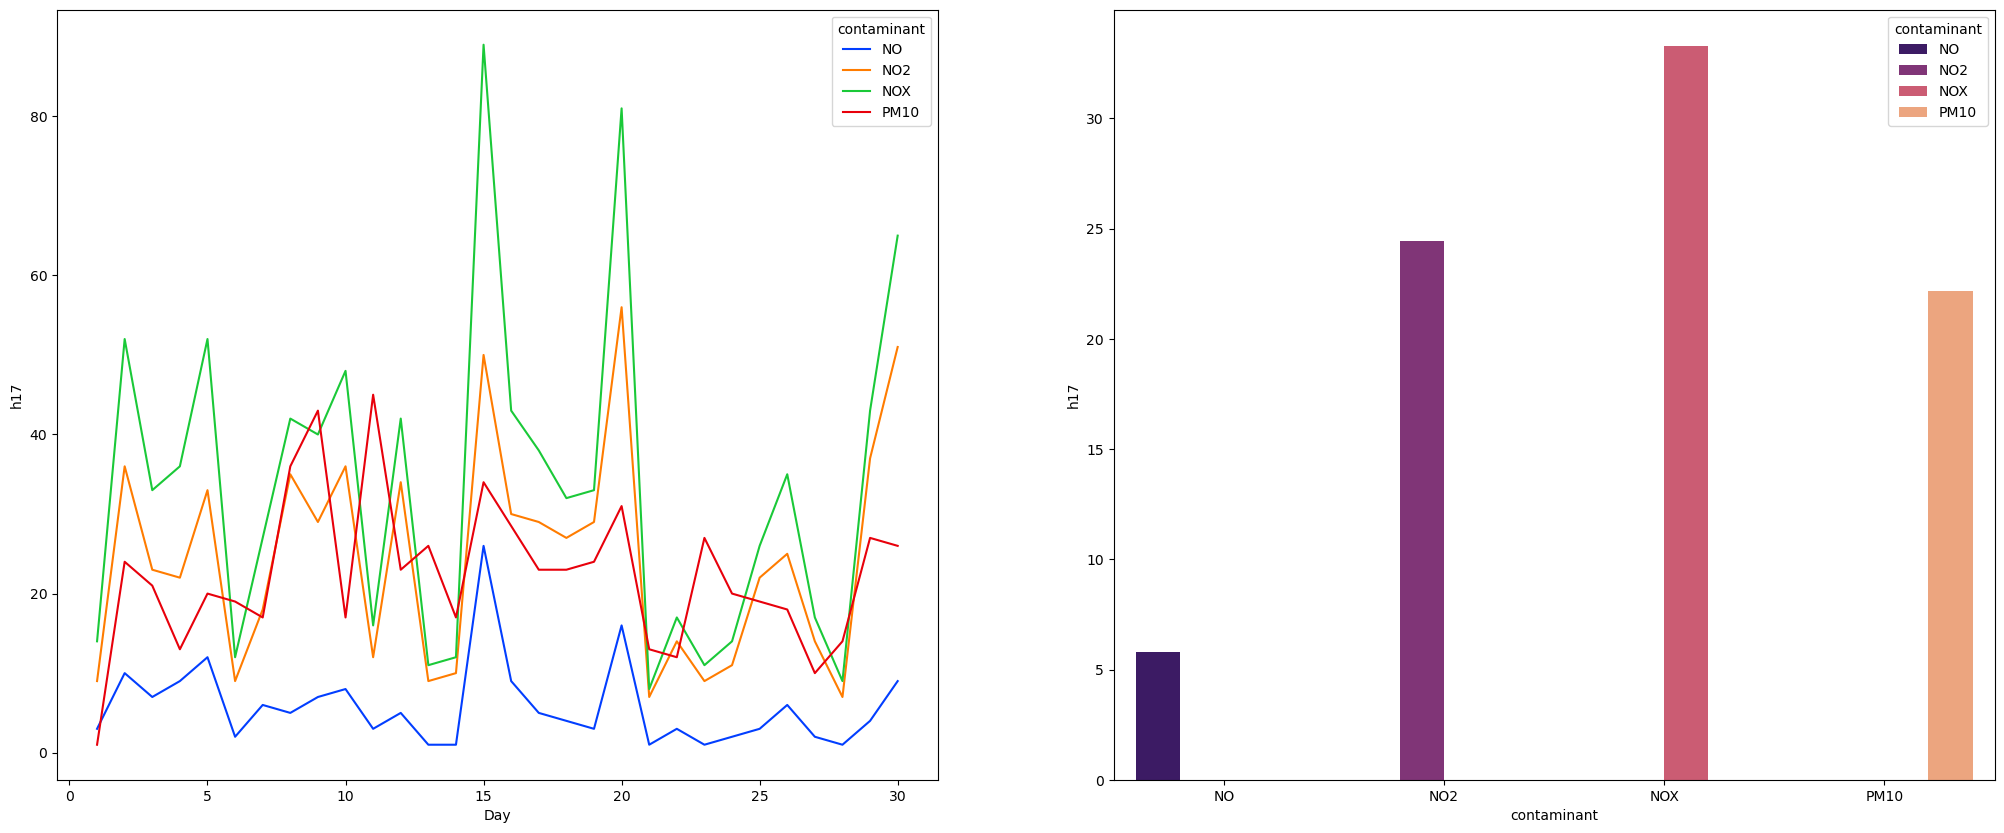

In [253]:
# Emtpy plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,10))

# For each plot, plot it somwhere
sns.lineplot(palette="bright",data=poble_nou_schoolafter_day_nov21, x="Day", y="h17", hue="contaminant", ax=axs[0])
sns.barplot(palette="magma",data=poble_nou_schoolafter_month_nov21, x="contaminant", y="h17", hue="contaminant", ax=axs[1])


# Mornings

In [186]:
# group by 
poble_nou_schoolmorning_day_nov21 = poble_nou_socioeco_nov21.groupby(['nom_estacio', 'Day', 'contaminant'])[ 'h09'].mean()

In [187]:
poble_nou_schoolmorning_day_nov21

nom_estacio           Day  contaminant
Barcelona (Poblenou)  1    NO               8.0
                           NO2             27.0
                           NOX             39.0
                           PM10             5.0
                      2    NO              11.0
                                          ...  
                      29   PM10            26.0
                      30   NO              81.0
                           NO2             52.0
                           NOX            176.0
                           PM10            44.0
Name: h09, Length: 120, dtype: float64

In [188]:
poble_nou_schoolmorning_day_nov21.reset_index(drop=True)

0        8.0
1       27.0
2       39.0
3        5.0
4       11.0
       ...  
115     26.0
116     81.0
117     52.0
118    176.0
119     44.0
Name: h09, Length: 120, dtype: float64

In [189]:
#Saving compact version
poble_nou_schoolmorning_day_nov21.to_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/poble_nou_schoolmorning_day_nov21.csv")

In [190]:
#Reading compact version 
poble_nou_schoolmorning_day_nov21 = pd.read_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/poble_nou_schoolmorning_day_nov21.csv")

In [191]:
poble_nou_schoolmorning_day_nov21

,nom_estacio,Day,contaminant,h09
0,Barcelona (Poblenou),1,NO,8.0
1,Barcelona (Poblenou),1,NO2,27.0
2,Barcelona (Poblenou),1,NOX,39.0
3,Barcelona (Poblenou),1,PM10,5.0
4,Barcelona (Poblenou),2,NO,11.0
...,...,...,...,...
115,Barcelona (Poblenou),29,PM10,26.0
116,Barcelona (Poblenou),30,NO,81.0
117,Barcelona (Poblenou),30,NO2,52.0
118,Barcelona (Poblenou),30,NOX,176.0


In [192]:
# group by 
poble_nou_schoolmorning_month_nov21 = poble_nou_socioeco_nov21.groupby(['nom_estacio', 'Month', 'contaminant'])[ 'h09'].mean()

In [193]:
poble_nou_schoolmorning_month_nov21

nom_estacio           Month  contaminant
Barcelona (Poblenou)  11     NO             20.866667
                             NO2            32.633333
                             NOX            64.500000
                             PM10           21.900000
Name: h09, dtype: float64

In [194]:
poble_nou_schoolmorning_month_nov21.reset_index(drop=True)

0    20.866667
1    32.633333
2    64.500000
3    21.900000
Name: h09, dtype: float64

In [195]:
#Saving compact version
poble_nou_schoolmorning_month_nov21.to_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/poble_nou_schoolmorning_month_nov21.csv")

In [196]:
#Reading compact version 
poble_nou_schoolmorning_month_nov21 = pd.read_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/poble_nou_schoolmorning_month_nov21.csv")

In [197]:
poble_nou_schoolmorning_month_nov21

,nom_estacio,Month,contaminant,h09
0,Barcelona (Poblenou),11,NO,20.866667
1,Barcelona (Poblenou),11,NO2,32.633333
2,Barcelona (Poblenou),11,NOX,64.500000
3,Barcelona (Poblenou),11,PM10,21.900000


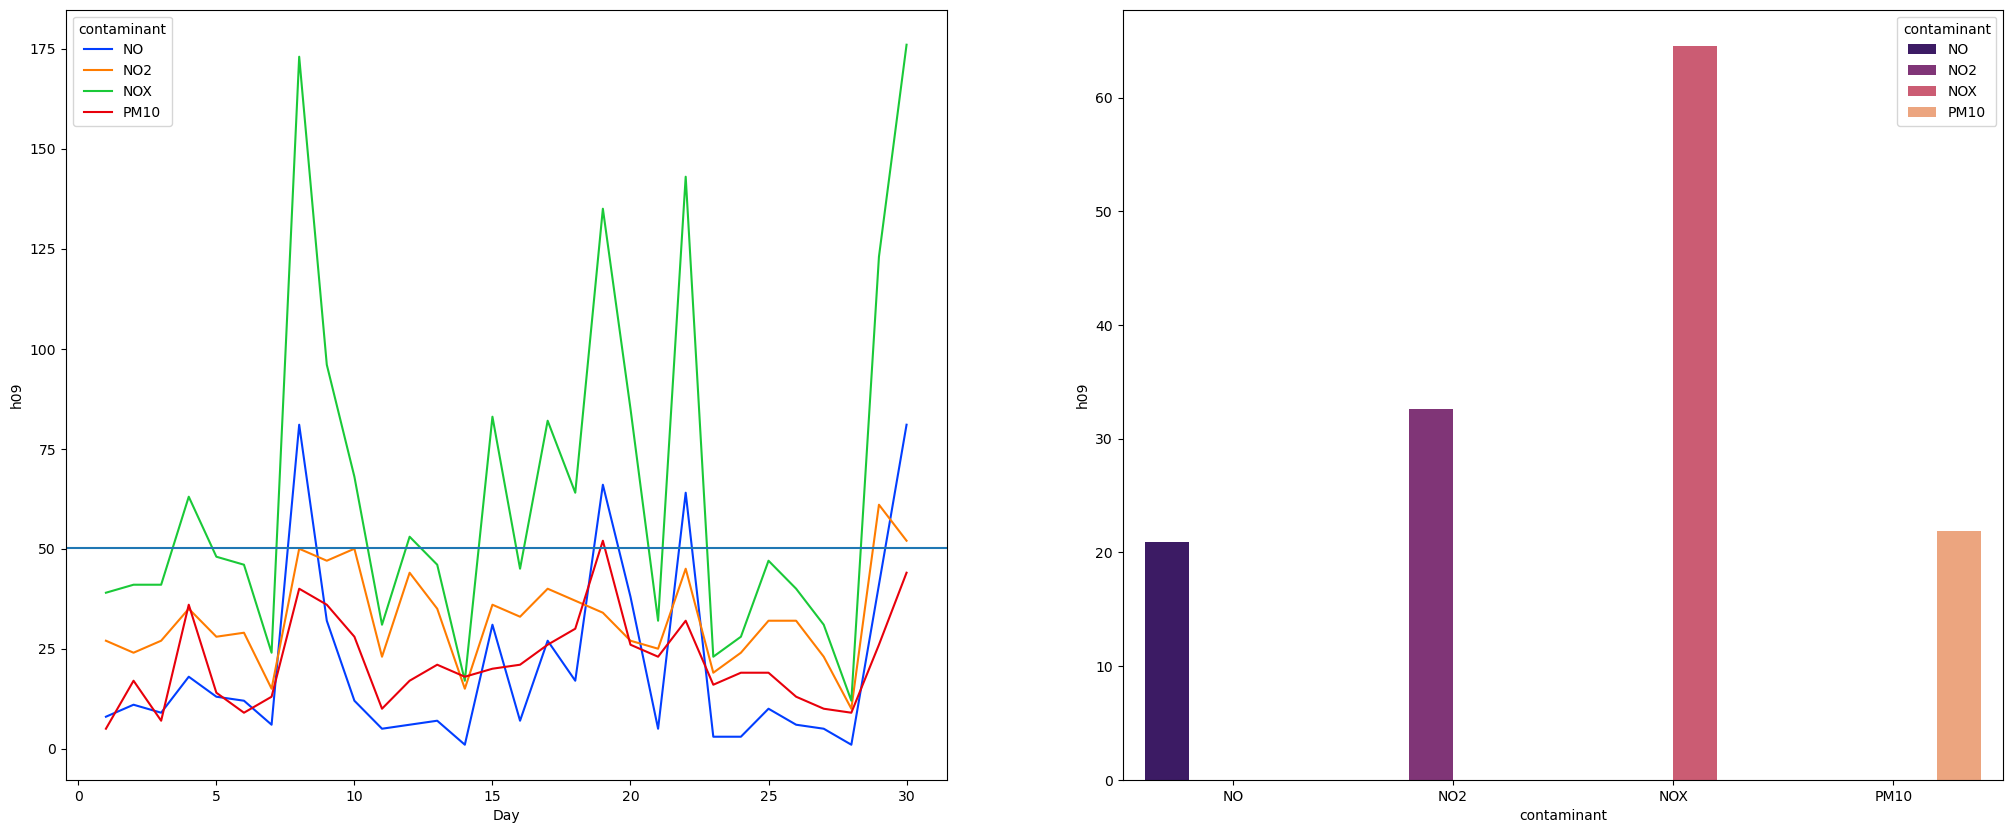

In [266]:
# Emtpy plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,10))




# For each plot, plot it somwhere
a = sns.lineplot(palette="bright",data=poble_nou_schoolmorning_day_nov21, x="Day", y="h09", hue="contaminant", ax=axs[0])
a.axhline(50.25)
b = sns.barplot(palette="magma",data=poble_nou_schoolmorning_month_nov21, x="contaminant", y="h09", hue="contaminant", ax=axs[1])


In [154]:
poble_nou_schoolhours_nov21

h08    h09   h14   h15   h16  \
nom_estacio          Month Day contaminant                                   
Barcelona (Poblenou) 11    2   NO            11.0   11.0  10.0   8.0   9.0   
                               NO2           23.0   24.0  21.0  23.0  35.0   
                               NOX           40.0   41.0  36.0  35.0  49.0   
                               PM10          11.0   17.0  16.0  13.0  27.0   
                           3   NO             9.0    9.0   8.0   7.0   7.0   
...                                           ...    ...   ...   ...   ...   
                           29  PM10          13.0   26.0  21.0  17.0  22.0   
                           30  NO            54.0   81.0  21.0   9.0   5.0   
                               NO2           49.0   52.0  52.0  41.0  30.0   
                               NOX          131.0  176.0  84.0  55.0  37.0   
                               PM10          45.0   44.0  36.0  29.0  22.0   

                                             h17  
nom_estacio          Month Day contaminant        
Barcelona (Poblenou) 11    2   NO           10.0  
                               NO2          36.0  
                               NOX          52.0  
                               PM10         24.0  
                           3   NO            7.0  
...                                          ...  
                           29  PM10         27.0  
                           30  NO            9.0  
                               NO2          51.0  
                               NOX          65.0  
                               PM10         26.0  

[116 rows x 6 columns]

In [150]:
poble_nou_schoolhours_nov21.reset_index(drop=True)

,h08,h09,h14,h15,h16,h17
0,11.0,11.0,10.0,8.0,9.0,10.0
1,23.0,24.0,21.0,23.0,35.0,36.0
2,40.0,41.0,36.0,35.0,49.0,52.0
3,11.0,17.0,16.0,13.0,27.0,24.0
4,9.0,9.0,8.0,7.0,7.0,7.0
...,...,...,...,...,...,...
111,13.0,26.0,21.0,17.0,22.0,27.0
112,54.0,81.0,21.0,9.0,5.0,9.0
113,49.0,52.0,52.0,41.0,30.0,51.0
114,131.0,176.0,84.0,55.0,37.0,65.0


In [156]:
#Saving compact version
poble_nou_schoolhours_nov21.to_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/poble_nou_schoolhours_nov21.csv")

In [157]:
#Reading compact version 
poble_nou_schoolhours_nov21 = pd.read_csv("/Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/poble_nou_schoolhours_nov21.csv")

In [160]:
poble_nou_schoolhours_nov21

,nom_estacio,Month,Day,contaminant,h08,h09,h14,h15,h16,h17
0,Barcelona (Poblenou),11,2,NO,11.0,11.0,10.0,8.0,9.0,10.0
1,Barcelona (Poblenou),11,2,NO2,23.0,24.0,21.0,23.0,35.0,36.0
2,Barcelona (Poblenou),11,2,NOX,40.0,41.0,36.0,35.0,49.0,52.0
3,Barcelona (Poblenou),11,2,PM10,11.0,17.0,16.0,13.0,27.0,24.0
4,Barcelona (Poblenou),11,3,NO,9.0,9.0,8.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...
111,Barcelona (Poblenou),11,29,PM10,13.0,26.0,21.0,17.0,22.0,27.0
112,Barcelona (Poblenou),11,30,NO,54.0,81.0,21.0,9.0,5.0,9.0
113,Barcelona (Poblenou),11,30,NO2,49.0,52.0,52.0,41.0,30.0,51.0
114,Barcelona (Poblenou),11,30,NOX,131.0,176.0,84.0,55.0,37.0,65.0


In [161]:
poble_nou_schoolhours_nov21('contaminant').plot();

TypeError: 'DataFrame' object is not callable

# Socio Economic

<AxesSubplot:xlabel='Day', ylabel='avg'>

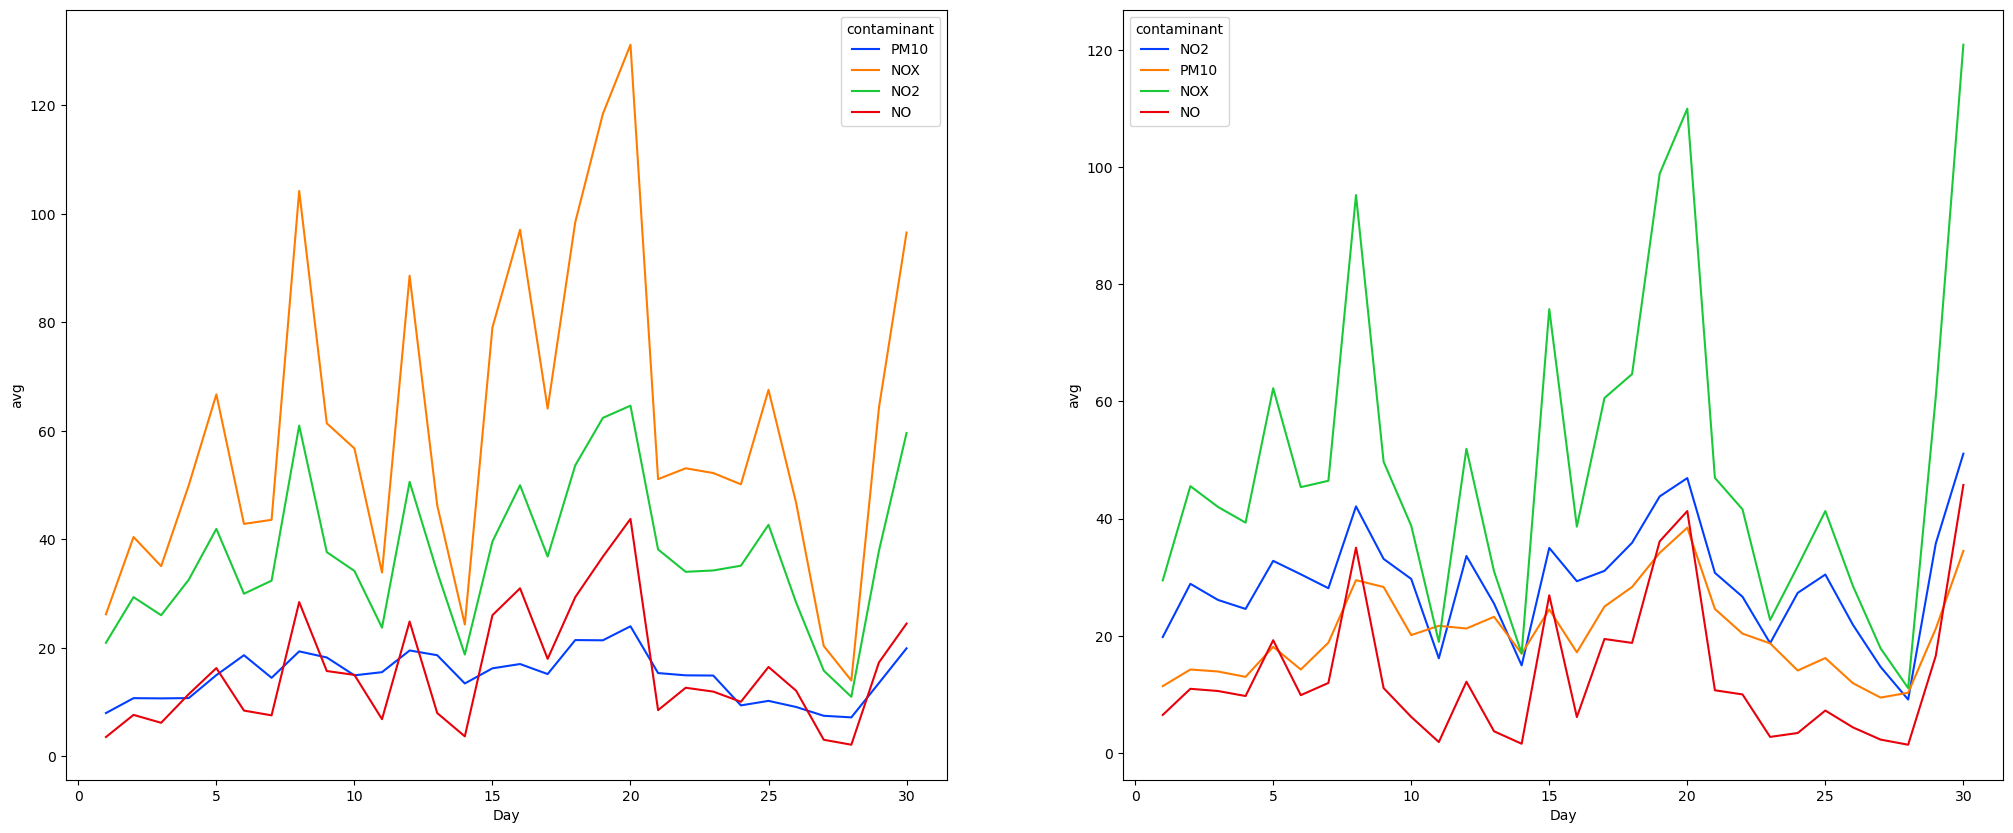

In [214]:
# Emtpy plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,10))

# For each plot, plot it somwhere
sns.lineplot(palette="bright",data=bcn_gracia_sangervasi_socioeco_nov21, x="Day", y="avg", hue="contaminant", ax=axs[0])
sns.lineplot(palette="bright",data=poble_nou_socioeco_nov21, x="Day", y="avg", hue="contaminant", ax=axs[1])


<AxesSubplot:xlabel='Day', ylabel='avg'>

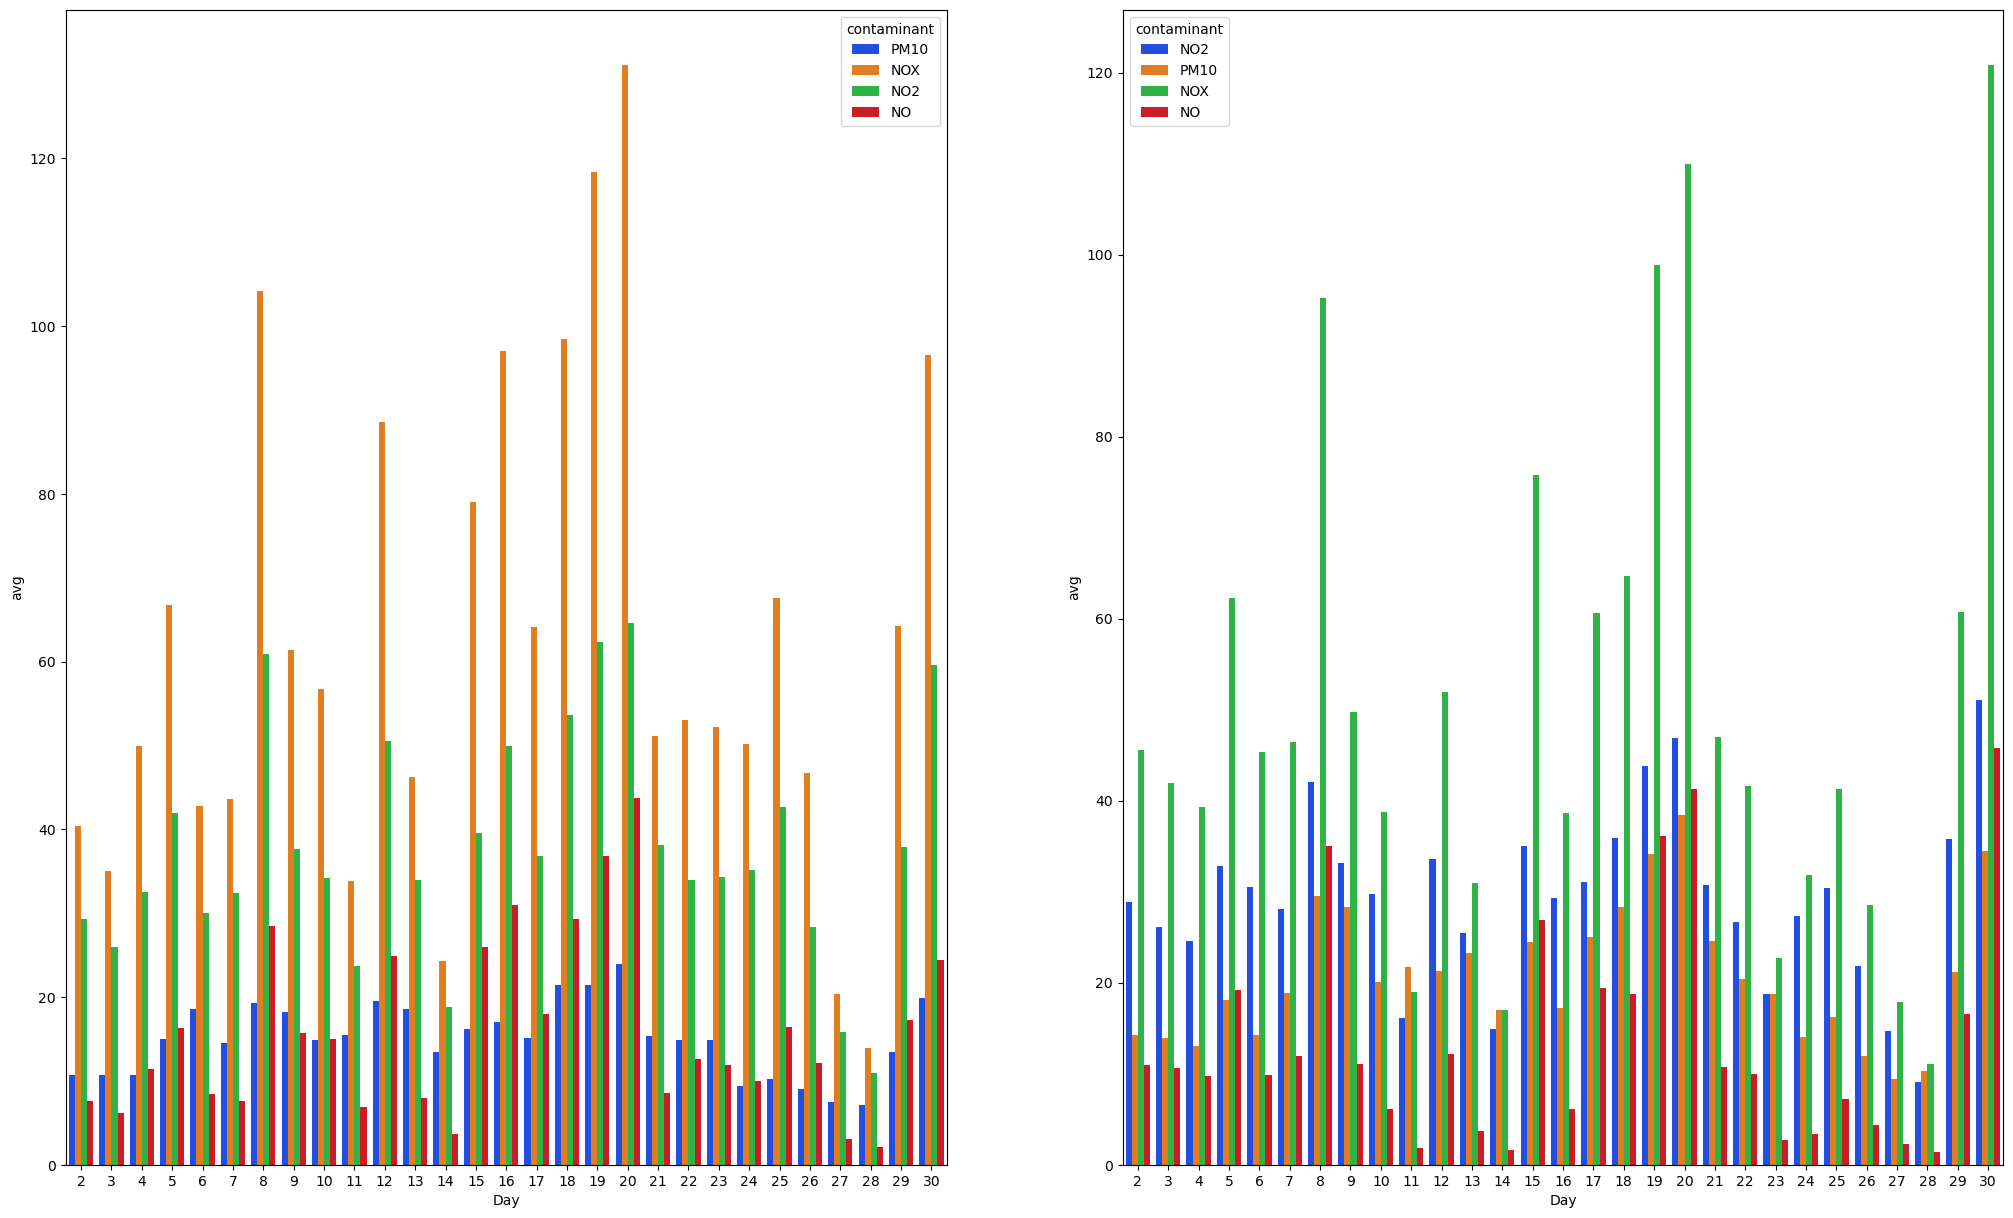

In [143]:
# Emtpy plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,15))

# For each plot, plot it somwhere
sns.barplot(palette="bright",data=bcn_gracia_sangervasi_socioeco_nov21, x="Day", y="avg", hue="contaminant", ax=axs[0])
sns.barplot(palette="bright",data=poble_nou_socioeco_nov21, x="Day", y="avg", hue="contaminant", ax=axs[1])


# Schools

In [ ]:
fig = px.bar(poble_nou_schoolhours_nov21, x="Day", y="avg", color="contaminant")
fig.show()

# Val Hebron

In [134]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=True)



fig.add_trace(go.Bar(x=bcn_gracia_sangervasi_socioeco_nov21['Day'], y=bcn_gracia_sangervasi_socioeco_nov21['avg']),color=bcn_gracia_sangervasi_socioeco_nov21['contaminant'], row=1, col=1)
fig.add_trace(go.Bar(x=poble_nou_socioeco_nov21['Day'], y=poble_nou_socioeco_nov21['avg']), color=poble_nou_socioeco_nov21['contaminant'], row=1, col=2)


fig.show()

TypeError: add_trace() got an unexpected keyword argument 'color'

In [13]:
# read file & save to variable 
val_hebron = pd.read_csv("///Users/hugosaccount/Desktop/IronHack/final_project/data/bcn/bcn_pollution_data/bcn_vall_hebron_tasf-thgu.csv")

In [14]:
val_hebron

,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,...,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column
0,8019054,Barcelona (Parc Vall Hebron),2022-10-01T00:00:00.000,14,O3,µg/m3,background,urban,8019,Barcelona,...,81.0,74.0,62.0,65.0,46.0,58.0,136,41.426110,2.148002,POINT (2.1480017 41.42611)
1,8019054,Barcelona (Parc Vall Hebron),2022-10-01T00:00:00.000,8,NO2,µg/m3,background,urban,8019,Barcelona,...,8.0,13.0,22.0,18.0,29.0,21.0,136,41.426110,2.148002,POINT (2.1480017 41.42611)
2,8019054,Barcelona (Parc Vall Hebron),2022-10-01T00:00:00.000,12,NOX,µg/m3,background,urban,8019,Barcelona,...,8.0,13.0,23.0,18.0,30.0,22.0,136,41.426110,2.148002,POINT (2.1480017 41.42611)
3,8019054,Barcelona (Parc Vall Hebron),2022-10-01T00:00:00.000,7,NO,µg/m3,background,urban,8019,Barcelona,...,1.0,1.0,1.0,1.0,1.0,1.0,136,41.426110,2.148002,POINT (2.1480017 41.42611)
4,8019054,Barcelona (Parc Vall Hebron),2022-10-01T00:00:00.000,6,CO,mg/m3,background,urban,8019,Barcelona,...,0.2,0.2,0.2,0.2,0.2,0.2,136,41.426110,2.148002,POINT (2.1480017 41.42611)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29599,8019054,Barcelona (Parc Vall Hebron),2010-01-01T00:00:00.000,1,SO2,µg/m3,background,urban,8019,Barcelona,...,2.0,2.0,2.0,2.0,2.0,1.0,136,41.426109,2.148002,POINT (2.148002 41.426109)
29600,8019054,Barcelona (Parc Vall Hebron),2010-01-01T00:00:00.000,6,CO,mg/m3,background,urban,8019,Barcelona,...,0.5,0.6,0.5,0.5,0.6,0.5,136,41.426109,2.148002,POINT (2.148002 41.426109)
29601,8019054,Barcelona (Parc Vall Hebron),2010-01-01T00:00:00.000,7,NO,µg/m3,background,urban,8019,Barcelona,...,1.0,1.0,1.0,1.0,1.0,1.0,136,41.426109,2.148002,POINT (2.148002 41.426109)
29602,8019054,Barcelona (Parc Vall Hebron),2010-01-01T00:00:00.000,14,O3,µg/m3,background,urban,8019,Barcelona,...,74.0,70.0,68.0,68.0,67.0,65.0,136,41.426109,2.148002,POINT (2.148002 41.426109)


In [20]:
#flatten time 
val_hebron['data'] = pd.to_datetime(val_hebron['data'])

In [21]:
val_hebron['date'] = [d.date() for d in val_hebron['data']]
val_hebron['time'] = [d.time() for d in val_hebron['data']]

In [22]:
val_hebron

,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,...,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column,date,time
0,8019054,Barcelona (Parc Vall Hebron),2022-10-01,14,O3,µg/m3,background,urban,8019,Barcelona,...,62.0,65.0,46.0,58.0,136,41.426110,2.148002,POINT (2.1480017 41.42611),2022-10-01,00:00:00
1,8019054,Barcelona (Parc Vall Hebron),2022-10-01,8,NO2,µg/m3,background,urban,8019,Barcelona,...,22.0,18.0,29.0,21.0,136,41.426110,2.148002,POINT (2.1480017 41.42611),2022-10-01,00:00:00
2,8019054,Barcelona (Parc Vall Hebron),2022-10-01,12,NOX,µg/m3,background,urban,8019,Barcelona,...,23.0,18.0,30.0,22.0,136,41.426110,2.148002,POINT (2.1480017 41.42611),2022-10-01,00:00:00
3,8019054,Barcelona (Parc Vall Hebron),2022-10-01,7,NO,µg/m3,background,urban,8019,Barcelona,...,1.0,1.0,1.0,1.0,136,41.426110,2.148002,POINT (2.1480017 41.42611),2022-10-01,00:00:00
4,8019054,Barcelona (Parc Vall Hebron),2022-10-01,6,CO,mg/m3,background,urban,8019,Barcelona,...,0.2,0.2,0.2,0.2,136,41.426110,2.148002,POINT (2.1480017 41.42611),2022-10-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29599,8019054,Barcelona (Parc Vall Hebron),2010-01-01,1,SO2,µg/m3,background,urban,8019,Barcelona,...,2.0,2.0,2.0,1.0,136,41.426109,2.148002,POINT (2.148002 41.426109),2010-01-01,00:00:00
29600,8019054,Barcelona (Parc Vall Hebron),2010-01-01,6,CO,mg/m3,background,urban,8019,Barcelona,...,0.5,0.5,0.6,0.5,136,41.426109,2.148002,POINT (2.148002 41.426109),2010-01-01,00:00:00
29601,8019054,Barcelona (Parc Vall Hebron),2010-01-01,7,NO,µg/m3,background,urban,8019,Barcelona,...,1.0,1.0,1.0,1.0,136,41.426109,2.148002,POINT (2.148002 41.426109),2010-01-01,00:00:00
29602,8019054,Barcelona (Parc Vall Hebron),2010-01-01,14,O3,µg/m3,background,urban,8019,Barcelona,...,68.0,68.0,67.0,65.0,136,41.426109,2.148002,POINT (2.148002 41.426109),2010-01-01,00:00:00


In [24]:
val_hebron.loc['2022-01-01':'2022-01-31']

,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,...,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column,date,time


In [27]:
val_hebron[(val_hebron['data']>datetime.date(2022,1,1)) & (val_hebron['data']<datetime.date(2022,1,31))] 

TypeError: Invalid comparison between dtype=datetime64[ns] and date

In [17]:
fig = px.line(val_hebron, x="data", y="magnitud", color='contaminant')
fig.show()

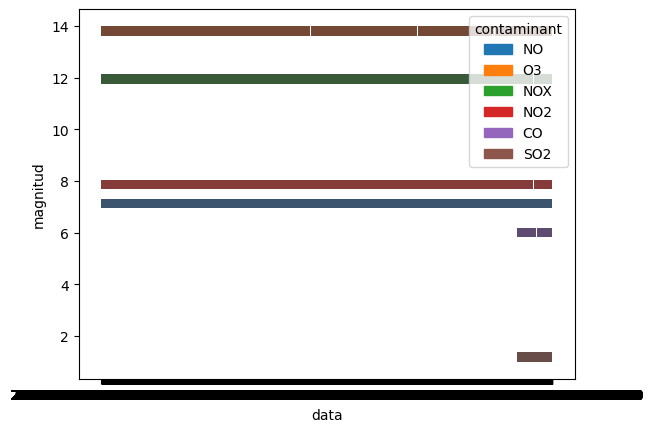

In [7]:
sns.histplot(x="data", y="magnitud", hue="contaminant", data=bcn_ciutadella_encoded_last);

In [8]:
import matplotlib.pyplot as plt

In [9]:
sns.set(rc={'figure.figsize':(11, 4)})

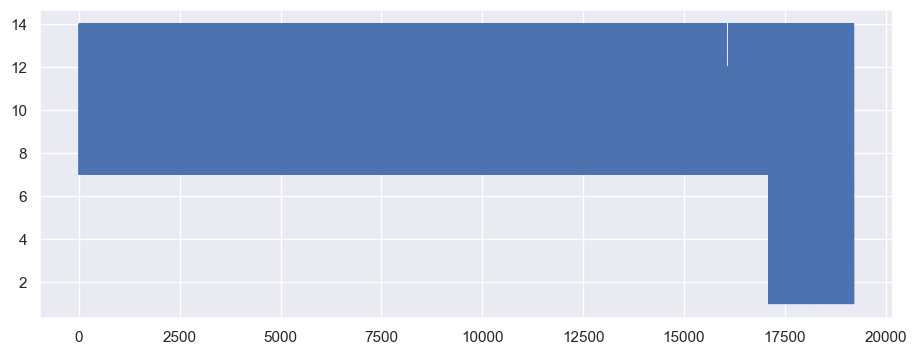

In [10]:
bcn_ciutadella_encoded_last['magnitud'].plot(linewidth=0.5);

# Data Vis BCN

In [28]:
# read file & save to variable 
bcn_co = pd.read_csv("//Users/hugosaccount/Desktop/IronHack/final_project/data/cities/barcelona/bcn_compact_newdate/bcn_compact_c0_newdate.csv")

In [29]:
bcn_co

,city,new date,AirPollutant,Concentration
0,barcelona,2013-01-01,CO,0.325166
1,barcelona,2013-01-02,CO,0.435976
2,barcelona,2013-01-03,CO,0.506748
3,barcelona,2013-01-04,CO,0.580864
4,barcelona,2013-01-05,CO,0.667683
...,...,...,...,...
2918,barcelona,2020-12-28,CO,0.287821
2919,barcelona,2020-12-29,CO,0.327517
2920,barcelona,2020-12-30,CO,0.341447
2921,barcelona,2020-12-31,CO,0.256627


In [30]:
fig = px.line(bcn_co, x="new date", y="Concentration", color='AirPollutant')
fig.show()